# Updating Solar Load Information with Updated Cost Information and Updated Last Time Step

## Smaller Solar Load (5000 kwh)

### June

status: optimal
Minimized Cost: $ 6464450.813504859


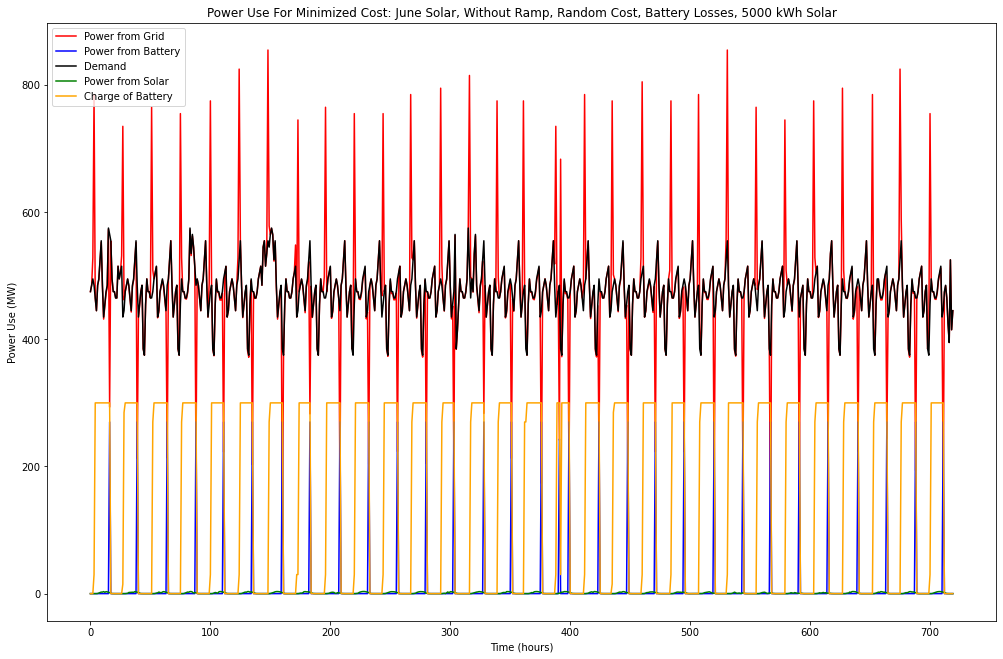

In [1]:
import pandas as pd
import cvxpy as cp
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mp

# establishing time length (hours)
t = 720 # one month

# establishing load values
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\ethylene 11.xlsx')
P_L = []
for n in range (0, t):
    P_L = P_L + [df.at[n, 'P_L']]
    
# establishing battery capacity (MW) and efficiency
E_max = 300
eff = 0.9

# defining battery charge variable
E_b = cp.Variable(t+1)

# defining power draw variables of grid (P_g_1) and battery (P_ch, P_dis)
P_g_1 = cp.Variable(t)
P_ch = cp.Variable(t)
P_dis = cp.Variable(t)
#P_b = cp.Variable(t)

# defining cost of power from grid (C_1) and cost of battery (C_b)
C_1 = []
C_b = []
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\houston pricing.xlsx', sheet_name='Jun')
for n in range (0, t):
    C_1 = C_1 + [df.at[n, "Settlement Point Price"]*(P_g_1[n])] #random price
# fixed price: C_1 = C_1 + [80*P_g_1[n]]
#    C_b = C_b + [(df.at[n, "Cost"])*P_b[n]]
    
# adding in solar
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\pvwatts_hourly_Houston_5000kwh.xlsx', sheet_name='j')
P_s = []
for n in range (0, t):
    P_s = P_s + [df.at[n, "ACMW"]]

# setting up equation to minimize
objective = sum(C_1)

# establishing constraints
constraints = []
constraints += [P_g_1 >= 0] # power draw is not negative 
constraints += [P_L == P_g_1 + P_dis + -P_ch + P_s] # the sources sum to load requirements
constraints += [E_b[0] == 0] # battery charge at start is zero
constraints += [P_ch >= 0] # charge into the is not negative
constraints += [1 >= eff] #efficiency cannot be greater than one
constraints += [P_dis >= 0] # discharge from battery is not negative
for n in range (0, t):
    constraints += [E_max >= P_ch[n]] # battery charge in one time step cannot be greater than the battery capacity
    constraints += [E_max >= P_dis[n]] # battery discharge in one time step cannot be greater than the battery capaticy
    n+1
for n in range (1, t+1):
    constraints += [E_b[n] == E_b[n-1] + eff*P_ch[n-1] - 1/eff*P_dis[n-1]] 
    # battery effectiveness impacts charge/discharge amounts of battery
    n+1    
for n in range (0, t+1):
    constraints += [E_b[n] >= 0] # battery charge is not negative
    constraints += [E_max >= E_b[n]] # battery charge cannot be greater than the capacity
    n+1
    
#solving problem
prob = cp.Problem(cp.Minimize(objective), constraints)
prob.solve() 

#printing results
print("status:", prob.status)
print("Minimized Cost: $", prob.value)

# battery charge variable for plotting
E_plot = []
for n in range (0, t):
    E_plot = E_plot + [E_b.value[n]]
    
#plotting the results  
plt.plot(range(0,t), P_g_1.value, "red", label = 'Power from Grid') 
plt.plot(range(0,t), P_dis.value, "blue", label = 'Power from Battery')
plt.plot(range(0,t), P_L, "black", label = 'Demand')
plt.plot(range(0,t), P_s, "green", label = 'Power from Solar') 
plt.plot(range(0,t), E_plot, "orange", label = 'Charge of Battery')
plt.xlabel("Time (hours)")
plt.ylabel("Power Use (MW)")
plt.title("Power Use For Minimized Cost: June Solar, Without Ramp, Random Cost, Battery Losses, 5000 kWh Solar")
leg = plt.legend()
fig = mp.pyplot.gcf()
fig.set_size_inches(17, 11)

### December

status: optimal
Minimized Cost: $ 6468480.704065698


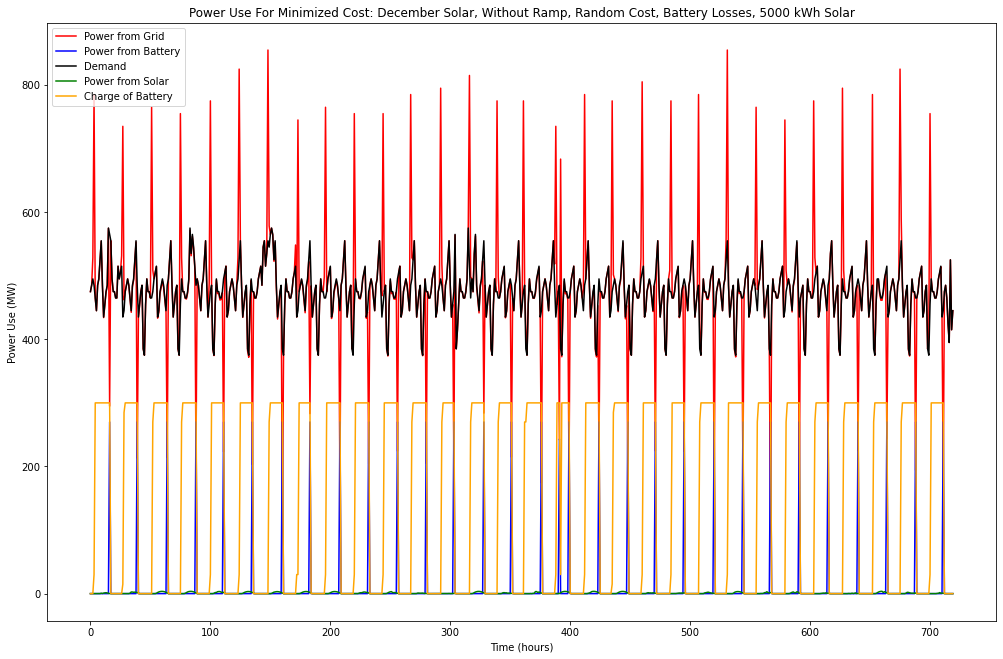

In [2]:
import pandas as pd
import cvxpy as cp
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mp

# establishing time length (hours)
t = 720 # one month

# establishing load values
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\ethylene 11.xlsx')
P_L = []
for n in range (0, t):
    P_L = P_L + [df.at[n, 'P_L']]
    
# establishing battery capacity (MW) and efficiency
E_max = 300
eff = 0.9

# defining battery charge variable
E_b = cp.Variable(t+1)

# defining power draw variables of grid (P_g_1) and battery (P_ch, P_dis)
P_g_1 = cp.Variable(t)
P_ch = cp.Variable(t)
P_dis = cp.Variable(t)
#P_b = cp.Variable(t)

# defining cost of power from grid (C_1) and cost of battery (C_b)
C_1 = []
C_b = []
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\houston pricing.xlsx', sheet_name='Jun')
for n in range (0, t):
    C_1 = C_1 + [df.at[n, "Settlement Point Price"]*(P_g_1[n])] #random price
# fixed price: C_1 = C_1 + [80*P_g_1[n]]
#    C_b = C_b + [(df.at[n, "Cost"])*P_b[n]]
    
# adding in solar
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\pvwatts_hourly_Houston_5000kwh.xlsx', sheet_name='d')
P_s = []
for n in range (0, t):
    P_s = P_s + [df.at[n, "ACMW"]]

# setting up equation to minimize
objective = sum(C_1)

# establishing constraints
constraints = []
constraints += [P_g_1 >= 0] # power draw is not negative 
constraints += [P_L == P_g_1 + P_dis + -P_ch + P_s] # the sources sum to load requirements
constraints += [E_b[0] == 0] # battery charge at start is zero
constraints += [P_ch >= 0] # charge into the is not negative
constraints += [1 >= eff] #efficiency cannot be greater than one
constraints += [P_dis >= 0] # discharge from battery is not negative
for n in range (0, t):
    constraints += [E_max >= P_ch[n]] # battery charge in one time step cannot be greater than the battery capacity
    constraints += [E_max >= P_dis[n]] # battery discharge in one time step cannot be greater than the battery capaticy
    n+1
for n in range (1, t+1):
    constraints += [E_b[n] == E_b[n-1] + eff*P_ch[n-1] - 1/eff*P_dis[n-1]] 
    # battery effectiveness impacts charge/discharge amounts of battery
    n+1    
for n in range (0, t+1):
    constraints += [E_b[n] >= 0] # battery charge is not negative
    constraints += [E_max >= E_b[n]] # battery charge cannot be greater than the capacity
    n+1
    
#solving problem
prob = cp.Problem(cp.Minimize(objective), constraints)
prob.solve() 

#printing results
print("status:", prob.status)
print("Minimized Cost: $", prob.value)

# battery charge variable for plotting
E_plot = []
for n in range (0, t):
    E_plot = E_plot + [E_b.value[n]]
    
#plotting the results  
plt.plot(range(0,t), P_g_1.value, "red", label = 'Power from Grid') 
plt.plot(range(0,t), P_dis.value, "blue", label = 'Power from Battery')
plt.plot(range(0,t), P_L, "black", label = 'Demand')
plt.plot(range(0,t), P_s, "green", label = 'Power from Solar') 
plt.plot(range(0,t), E_plot, "orange", label = 'Charge of Battery')
plt.xlabel("Time (hours)")
plt.ylabel("Power Use (MW)")
plt.title("Power Use For Minimized Cost: December Solar, Without Ramp, Random Cost, Battery Losses, 5000 kWh Solar")
leg = plt.legend()
fig = mp.pyplot.gcf()
fig.set_size_inches(17, 11)

## Larger Solar Load (15000 kwh)

### June

status: optimal
Minimized Cost: $ 6432060.9682255965


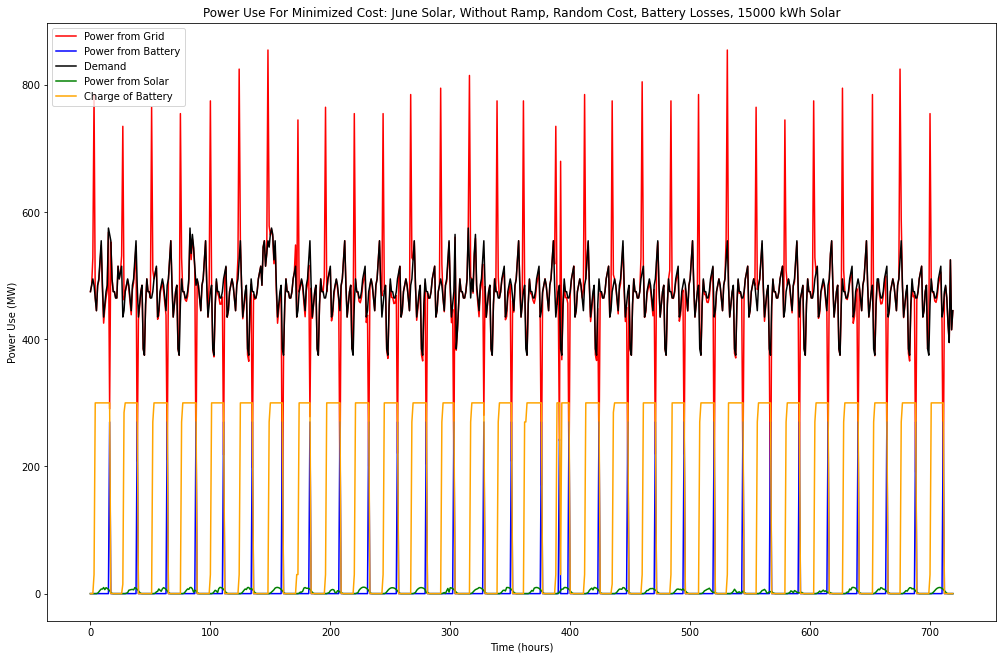

In [3]:
import pandas as pd
import cvxpy as cp
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mp

# establishing time length (hours)
t = 720 # one month

# establishing load values
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\ethylene 11.xlsx')
P_L = []
for n in range (0, t):
    P_L = P_L + [df.at[n, 'P_L']]
    
# establishing battery capacity (MW) and efficiency
E_max = 300
eff = 0.9

# defining battery charge variable
E_b = cp.Variable(t+1)

# defining power draw variables of grid (P_g_1) and battery (P_ch, P_dis)
P_g_1 = cp.Variable(t)
P_ch = cp.Variable(t)
P_dis = cp.Variable(t)
#P_b = cp.Variable(t)

# defining cost of power from grid (C_1) and cost of battery (C_b)
C_1 = []
C_b = []
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\houston pricing.xlsx', sheet_name='Jun')
for n in range (0, t):
    C_1 = C_1 + [df.at[n, "Settlement Point Price"]*(P_g_1[n])] #random price
# fixed price: C_1 = C_1 + [80*P_g_1[n]]
#    C_b = C_b + [(df.at[n, "Cost"])*P_b[n]]
    
# adding in solar
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\pvwatts_hourly_Houston_15000kwh.xlsx', sheet_name='j')
P_s = []
for n in range (0, t):
    P_s = P_s + [df.at[n, "ACMW"]]

# setting up equation to minimize
objective = sum(C_1)

# establishing constraints
constraints = []
constraints += [P_g_1 >= 0] # power draw is not negative 
constraints += [P_L == P_g_1 + P_dis + -P_ch + P_s] # the sources sum to load requirements
constraints += [E_b[0] == 0] # battery charge at start is zero
constraints += [P_ch >= 0] # charge into the is not negative
constraints += [1 >= eff] #efficiency cannot be greater than one
constraints += [P_dis >= 0] # discharge from battery is not negative
for n in range (0, t):
    constraints += [E_max >= P_ch[n]] # battery charge in one time step cannot be greater than the battery capacity
    constraints += [E_max >= P_dis[n]] # battery discharge in one time step cannot be greater than the battery capaticy
    n+1
for n in range (1, t+1):
    constraints += [E_b[n] == E_b[n-1] + eff*P_ch[n-1] - 1/eff*P_dis[n-1]] 
    # battery effectiveness impacts charge/discharge amounts of battery
    n+1    
for n in range (0, t+1):
    constraints += [E_b[n] >= 0] # battery charge is not negative
    constraints += [E_max >= E_b[n]] # battery charge cannot be greater than the capacity
    n+1  
    
#solving problem
prob = cp.Problem(cp.Minimize(objective), constraints)
prob.solve() 

#printing results
print("status:", prob.status)
print("Minimized Cost: $", prob.value)

# battery charge variable for plotting
E_plot = []
for n in range (0, t):
    E_plot = E_plot + [E_b.value[n]]
    
#plotting the results  
plt.plot(range(0,t), P_g_1.value, "red", label = 'Power from Grid') 
plt.plot(range(0,t), P_dis.value, "blue", label = 'Power from Battery')
plt.plot(range(0,t), P_L, "black", label = 'Demand')
plt.plot(range(0,t), P_s, "green", label = 'Power from Solar') 
plt.plot(range(0,t), E_plot, "orange", label = 'Charge of Battery')
plt.xlabel("Time (hours)")
plt.ylabel("Power Use (MW)")
plt.title("Power Use For Minimized Cost: June Solar, Without Ramp, Random Cost, Battery Losses, 15000 kWh Solar")
leg = plt.legend()
fig = mp.pyplot.gcf()
fig.set_size_inches(17, 11)

### December

status: optimal
Minimized Cost: $ 6444150.6399643235


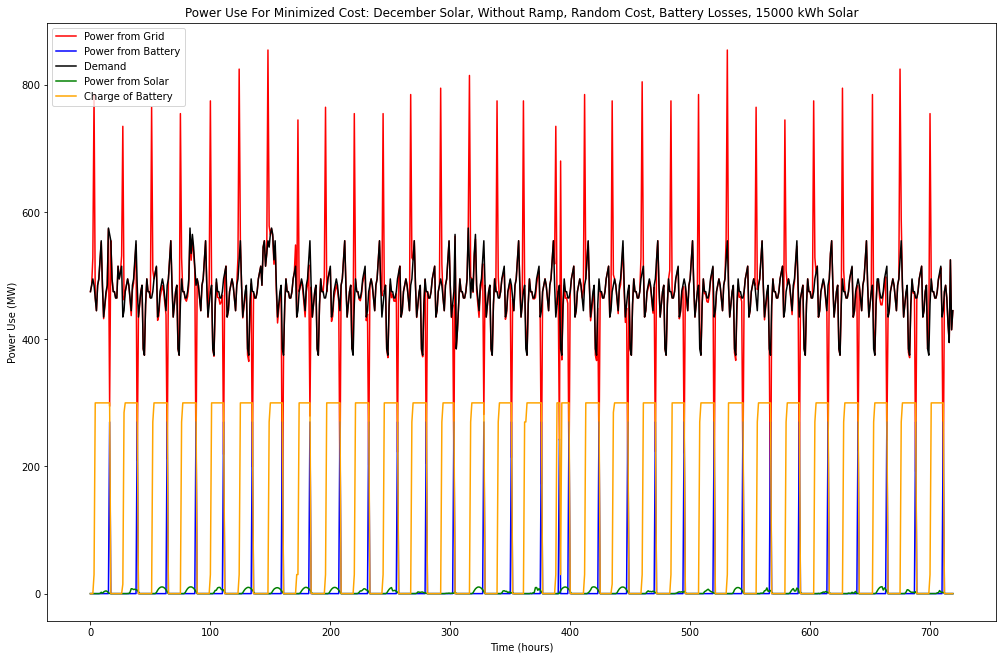

In [4]:
import pandas as pd
import cvxpy as cp
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mp

# establishing time length (hours)
t = 720 # one month

# establishing load values
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\ethylene 11.xlsx')
P_L = []
for n in range (0, t):
    P_L = P_L + [df.at[n, 'P_L']]
    
# establishing battery capacity (MW) and efficiency
E_max = 300
eff = 0.9

# defining battery charge variable
E_b = cp.Variable(t+1)

# defining power draw variables of grid (P_g_1) and battery (P_ch, P_dis)
P_g_1 = cp.Variable(t)
P_ch = cp.Variable(t)
P_dis = cp.Variable(t)
#P_b = cp.Variable(t)

# defining cost of power from grid (C_1) and cost of battery (C_b)
C_1 = []
C_b = []
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\houston pricing.xlsx', sheet_name='Jun')
for n in range (0, t):
    C_1 = C_1 + [df.at[n, "Settlement Point Price"]*(P_g_1[n])] #random price
# fixed price: C_1 = C_1 + [80*P_g_1[n]]
#    C_b = C_b + [(df.at[n, "Cost"])*P_b[n]]
    
# adding in solar
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\pvwatts_hourly_Houston_15000kwh.xlsx', sheet_name='d')
P_s = []
for n in range (0, t):
    P_s = P_s + [df.at[n, "ACMW"]]

# setting up equation to minimize
objective = sum(C_1)

# establishing constraints
constraints = []
constraints += [P_g_1 >= 0] # power draw is not negative 
constraints += [P_L == P_g_1 + P_dis + -P_ch + P_s] # the sources sum to load requirements
constraints += [E_b[0] == 0] # battery charge at start is zero
constraints += [P_ch >= 0] # charge into the is not negative
constraints += [1 >= eff] #efficiency cannot be greater than one
constraints += [P_dis >= 0] # discharge from battery is not negative
for n in range (0, t):
    constraints += [E_max >= P_ch[n]] # battery charge in one time step cannot be greater than the battery capacity
    constraints += [E_max >= P_dis[n]] # battery discharge in one time step cannot be greater than the battery capaticy
    n+1
for n in range (1, t+1):
    constraints += [E_b[n] == E_b[n-1] + eff*P_ch[n-1] - 1/eff*P_dis[n-1]] 
    # battery effectiveness impacts charge/discharge amounts of battery
    n+1    
for n in range (0, t+1):
    constraints += [E_b[n] >= 0] # battery charge is not negative
    constraints += [E_max >= E_b[n]] # battery charge cannot be greater than the capacity
    n+1   
    
#solving problem
prob = cp.Problem(cp.Minimize(objective), constraints)
prob.solve() 

#printing results
print("status:", prob.status)
print("Minimized Cost: $", prob.value)

# battery charge variable for plotting
E_plot = []
for n in range (0, t):
    E_plot = E_plot + [E_b.value[n]]
    
#plotting the results  
plt.plot(range(0,t), P_g_1.value, "red", label = 'Power from Grid') 
plt.plot(range(0,t), P_dis.value, "blue", label = 'Power from Battery')
plt.plot(range(0,t), P_L, "black", label = 'Demand')
plt.plot(range(0,t), P_s, "green", label = 'Power from Solar') 
plt.plot(range(0,t), E_plot, "orange", label = 'Charge of Battery')
plt.xlabel("Time (hours)")
plt.ylabel("Power Use (MW)")
plt.title("Power Use For Minimized Cost: December Solar, Without Ramp, Random Cost, Battery Losses, 15000 kWh Solar")
leg = plt.legend()
fig = mp.pyplot.gcf()
fig.set_size_inches(17, 11)

## Largest Solar Load (20000 kwh)

### June

status: optimal
Minimized Cost: $ 6415866.045739316


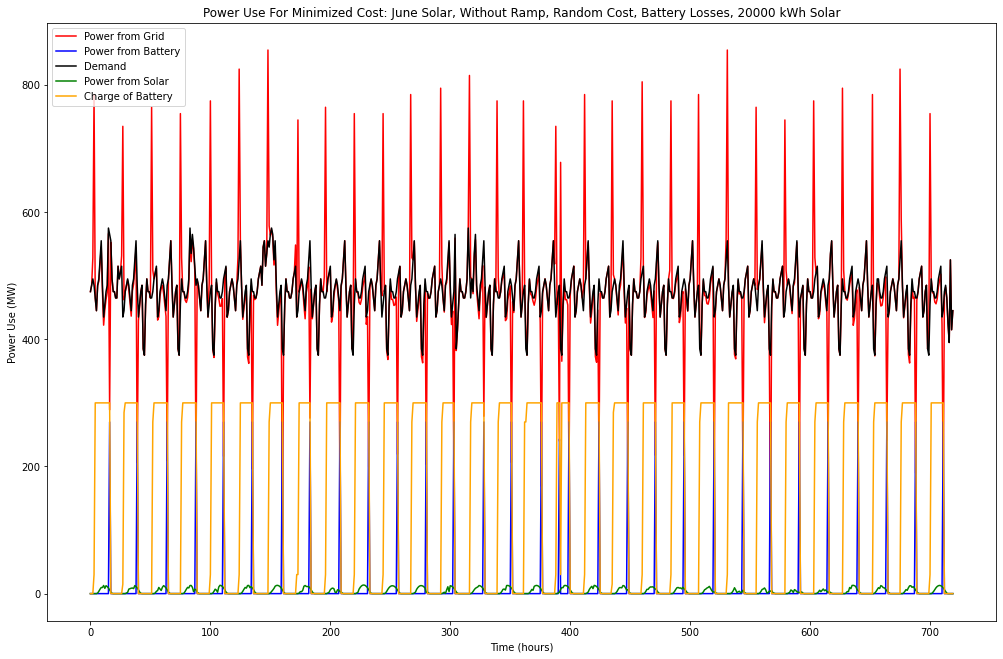

In [16]:
import pandas as pd
import cvxpy as cp
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mp

# establishing time length (hours)
t = 720 # one month

# establishing load values
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\ethylene 11.xlsx')
P_L = []
for n in range (0, t):
    P_L = P_L + [df.at[n, 'P_L']]
    
# establishing battery capacity (MW) and efficiency
E_max = 300
eff = 0.9

# defining battery charge variable
E_b = cp.Variable(t+1)

# defining power draw variables of grid (P_g_1) and battery (P_ch, P_dis)
P_g_1 = cp.Variable(t)
P_ch = cp.Variable(t)
P_dis = cp.Variable(t)
#P_b = cp.Variable(t)

# defining cost of power from grid (C_1) and cost of battery (C_b)
C_1 = []
C_b = []
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\houston pricing.xlsx', sheet_name='Jun')
for n in range (0, t):
    C_1 = C_1 + [df.at[n, "Settlement Point Price"]*(P_g_1[n])] #random price
# fixed price: C_1 = C_1 + [80*P_g_1[n]]
#    C_b = C_b + [(df.at[n, "Cost"])*P_b[n]]
    
# adding in solar
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\pvwatts_hourly_Houston_20000kwh.xlsx', sheet_name='j')
P_s = []
for n in range (0, t):
    P_s = P_s + [df.at[n, "ACMW"]]

# setting up equation to minimize
objective = sum(C_1)

# establishing constraints
constraints = []
constraints += [P_g_1 >= 0] # power draw is not negative 
constraints += [P_L == P_g_1 + P_dis + -P_ch + P_s] # the sources sum to load requirements
constraints += [E_b[0] == 0] # battery charge at start is zero
constraints += [P_ch >= 0] # charge into the is not negative
constraints += [1 >= eff] #efficiency cannot be greater than one
constraints += [P_dis >= 0] # discharge from battery is not negative
for n in range (0, t):
    constraints += [E_max >= P_ch[n]] # battery charge in one time step cannot be greater than the battery capacity
    constraints += [E_max >= P_dis[n]] # battery discharge in one time step cannot be greater than the battery capaticy
    n+1
for n in range (1, t+1):
    constraints += [E_b[n] == E_b[n-1] + eff*P_ch[n-1] - 1/eff*P_dis[n-1]] 
    # battery effectiveness impacts charge/discharge amounts of battery
    n+1    
for n in range (0, t+1):
    constraints += [E_b[n] >= 0] # battery charge is not negative
    constraints += [E_max >= E_b[n]] # battery charge cannot be greater than the capacity
    n+1
    
#solving problem
prob = cp.Problem(cp.Minimize(objective), constraints)
prob.solve() 

#printing results
print("status:", prob.status)
print("Minimized Cost: $", prob.value)

# battery charge variable for plotting
E_plot = []
for n in range (0, t):
    E_plot = E_plot + [E_b.value[n]]
    
#plotting the results  
plt.plot(range(0,t), P_g_1.value, "red", label = 'Power from Grid') 
plt.plot(range(0,t), P_dis.value, "blue", label = 'Power from Battery')
plt.plot(range(0,t), P_L, "black", label = 'Demand')
plt.plot(range(0,t), P_s, "green", label = 'Power from Solar') 
plt.plot(range(0,t), E_plot, "orange", label = 'Charge of Battery')
plt.xlabel("Time (hours)")
plt.ylabel("Power Use (MW)")
plt.title("Power Use For Minimized Cost: June Solar, Without Ramp, Random Cost, Battery Losses, 20000 kWh Solar")
leg = plt.legend()
fig = mp.pyplot.gcf()
fig.set_size_inches(17, 11)

### December

status: optimal
Minimized Cost: $ 6970631.8834874695


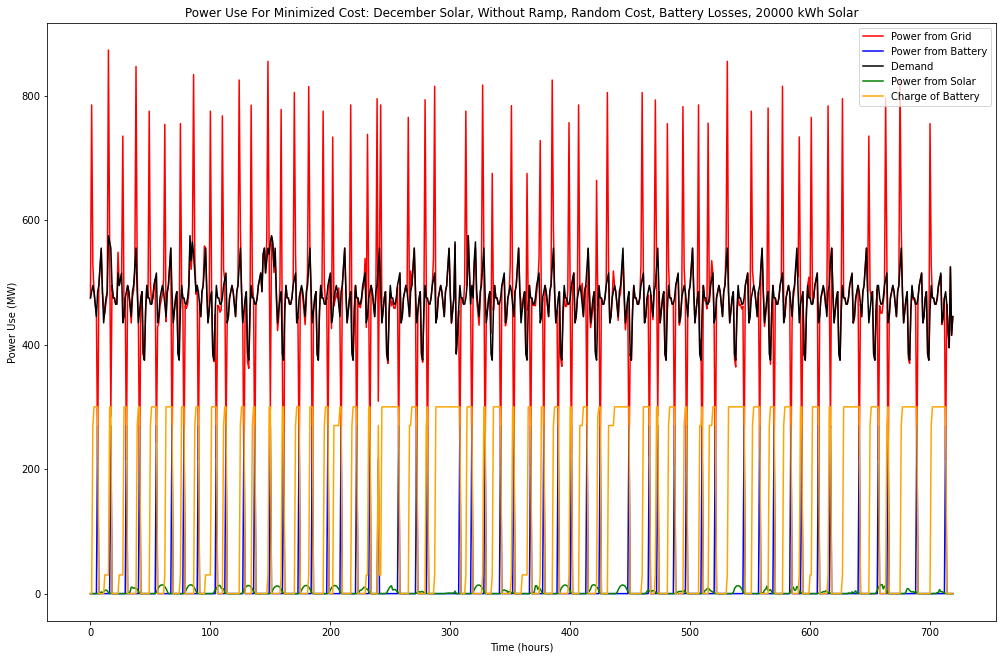

In [18]:
import pandas as pd
import cvxpy as cp
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mp

# establishing time length (hours)
t = 720 # one month

# establishing load values
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\ethylene 11.xlsx')
P_L = []
for n in range (0, t):
    P_L = P_L + [df.at[n, 'P_L']]
    
# establishing battery capacity (MW) and efficiency
E_max = 300
eff = 0.9

# defining battery charge variable
E_b = cp.Variable(t+1)

# defining power draw variables of grid (P_g_1) and battery (P_ch, P_dis)
P_g_1 = cp.Variable(t)
P_ch = cp.Variable(t)
P_dis = cp.Variable(t)
#P_b = cp.Variable(t)

# defining cost of power from grid (C_1) and cost of battery (C_b)
C_1 = []
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\houston pricing.xlsx', sheet_name='Dec')
for n in range (0, t):
    C_1 = C_1 + [df.at[n, "Settlement Point Price"]*(P_g_1[n])] #random price
    
# adding in solar
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\pvwatts_hourly_Houston_20000kwh.xlsx', sheet_name='d')
P_s = []
for n in range (0, t):
    P_s = P_s + [df.at[n, "ACMW"]]

# setting up equation to minimize
objective = sum(C_1)

# establishing constraints
constraints = []
constraints += [P_g_1 >= 0] # power draw is not negative 
constraints += [P_L == P_g_1 + P_dis + -P_ch + P_s] # the sources sum to load requirements
constraints += [E_b[0] == 0] # battery charge at start is zero
constraints += [P_ch >= 0] # charge into the is not negative
constraints += [1 >= eff] #efficiency cannot be greater than one
constraints += [P_dis >= 0] # discharge from battery is not negative
for n in range (0, t):
    constraints += [E_max >= P_ch[n]] # battery charge in one time step cannot be greater than the battery capacity
    constraints += [E_max >= P_dis[n]] # battery discharge in one time step cannot be greater than the battery capaticy
    n+1
for n in range (1, t+1):
    constraints += [E_b[n] == E_b[n-1] + eff*P_ch[n-1] - 1/eff*P_dis[n-1]] 
    # battery effectiveness impacts charge/discharge amounts of battery
    n+1    
for n in range (0, t+1):
    constraints += [E_b[n] >= 0] # battery charge is not negative
    constraints += [E_max >= E_b[n]] # battery charge cannot be greater than the capacity
    n+1
    
#solving problem
prob = cp.Problem(cp.Minimize(objective), constraints)
prob.solve() 

#printing results
print("status:", prob.status)
print("Minimized Cost: $", prob.value)

# battery charge variable for plotting
E_plot = []
for n in range (0, t):
    E_plot = E_plot + [E_b.value[n]]
    
#plotting the results  
plt.plot(range(0,t), P_g_1.value, "red", label = 'Power from Grid') 
plt.plot(range(0,t), P_dis.value, "blue", label = 'Power from Battery')
plt.plot(range(0,t), P_L, "black", label = 'Demand')
plt.plot(range(0,t), P_s, "green", label = 'Power from Solar') 
plt.plot(range(0,t), E_plot, "orange", label = 'Charge of Battery')
plt.xlabel("Time (hours)")
plt.ylabel("Power Use (MW)")
plt.title("Power Use For Minimized Cost: December Solar, Without Ramp, Random Cost, Battery Losses, 20000 kWh Solar")
leg = plt.legend()
fig = mp.pyplot.gcf()
fig.set_size_inches(17, 11)

# Battery Cost

### https://www.tesla.com/megapack/design 78 megapacks, texas

In [28]:
# monthly payment calculator

i = 0.04/12 # interest rate per month
t = 0.0825 # tax rate 
m = 240 # payback period (months)
j = 0.02/12 # annual maintenance interest rate per month

# costs (dollars)
C_pt = 125663350 # cost pre tax, from website 
C_t = C_pt*t + C_pt # cost with tax
C_m = 239270 # maintenance cost annual, from website 
C_d = 5000 # deposit, from website 

# future value calculations
fv_a = 5000*((1+i)**m) 
fv_b = 0
fv_c = 0
for n in range (0, m):
    fv_b = fv_b + C_m*((1+j)**n)*((1+i)**n)
    fv_c = fv_c + (C_t/m)*((1+i)**n)
    n+1
fv = fv_a + fv_b + fv_c
print("fv: $", fv)

# monthly payment
pmt = fv*(i/(((1+i)**m) - 1))*(1/(1+i))

print("monthly payment: $", pmt)

fv: $ 318536683.9296322
monthly payment: $ 865595.381844615


status: optimal
Minimized Cost: $ 7281461.427583931


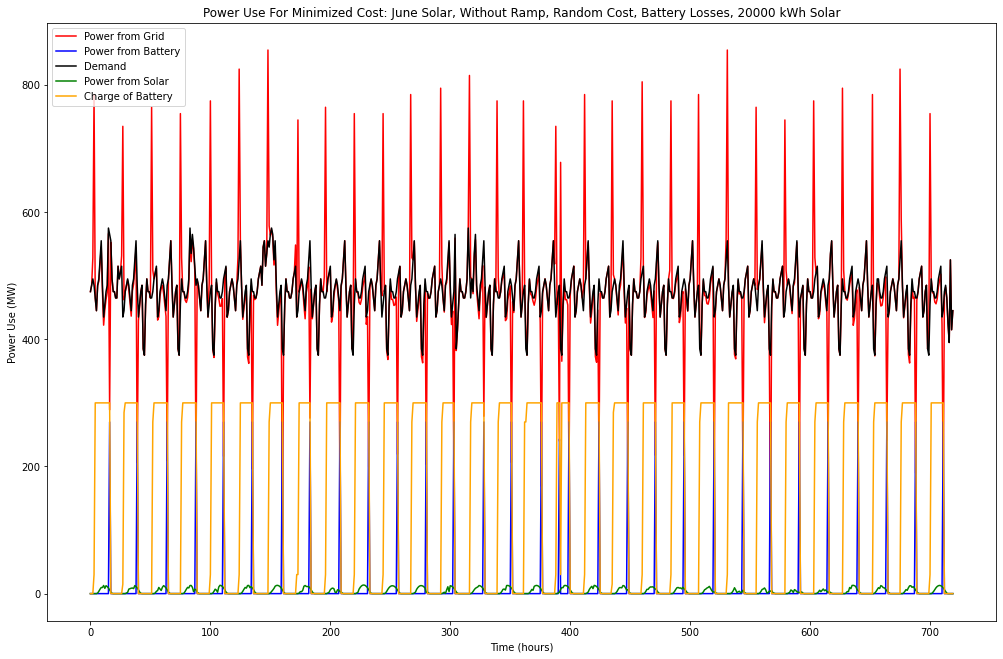

In [30]:
import pandas as pd
import cvxpy as cp
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mp

# establishing time length (hours)
t = 720 # one month

# establishing load values
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\ethylene 11.xlsx')
P_L = []
for n in range (0, t):
    P_L = P_L + [df.at[n, 'P_L']]
    
# establishing battery capacity (MW) and efficiency
E_max = 300
eff = 0.9

# defining battery charge variable
E_b = cp.Variable(t+1)

# defining power draw variables of grid (P_g_1) and battery (P_ch, P_dis)
P_g_1 = cp.Variable(t)
P_ch = cp.Variable(t)
P_dis = cp.Variable(t)
#P_b = cp.Variable(t)

# defining cost of power from grid (C_1) and cost of battery (C_b)
C_1 = []
C_b = pmt
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\houston pricing.xlsx', sheet_name='Jun')
for n in range (0, t):
    C_1 = C_1 + [df.at[n, "Settlement Point Price"]*(P_g_1[n])] #random price
    
# adding in solar
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\pvwatts_hourly_Houston_20000kwh.xlsx', sheet_name='j')
P_s = []
for n in range (0, t):
    P_s = P_s + [df.at[n, "ACMW"]]

# setting up equation to minimize
objective = sum(C_1) + C_b

# establishing constraints
constraints = []
constraints += [P_g_1 >= 0] # power draw is not negative 
constraints += [P_L == P_g_1 + P_dis + -P_ch + P_s] # the sources sum to load requirements
constraints += [E_b[0] == 0] # battery charge at start is zero
constraints += [P_ch >= 0] # charge into the is not negative
constraints += [1 >= eff] #efficiency cannot be greater than one
constraints += [P_dis >= 0] # discharge from battery is not negative
for n in range (0, t):
    constraints += [E_max >= P_ch[n]] # battery charge in one time step cannot be greater than the battery capacity
    constraints += [E_max >= P_dis[n]] # battery discharge in one time step cannot be greater than the battery capaticy
    n+1
for n in range (1, t+1):
    constraints += [E_b[n] == E_b[n-1] + eff*P_ch[n-1] - 1/eff*P_dis[n-1]] 
    # battery effectiveness impacts charge/discharge amounts of battery
    n+1    
for n in range (0, t+1):
    constraints += [E_b[n] >= 0] # battery charge is not negative
    constraints += [E_max >= E_b[n]] # battery charge cannot be greater than the capacity
    n+1  
    
#solving problem
prob = cp.Problem(cp.Minimize(objective), constraints)
prob.solve() 

#printing results
print("status:", prob.status)
print("Minimized Cost: $", prob.value)

# battery charge variable for plotting
E_plot = []
for n in range (0, t):
    E_plot = E_plot + [E_b.value[n]]
    
#plotting the results  
plt.plot(range(0,t), P_g_1.value, "red", label = 'Power from Grid') 
plt.plot(range(0,t), P_dis.value, "blue", label = 'Power from Battery')
plt.plot(range(0,t), P_L, "black", label = 'Demand')
plt.plot(range(0,t), P_s, "green", label = 'Power from Solar') 
plt.plot(range(0,t), E_plot, "orange", label = 'Charge of Battery')
plt.xlabel("Time (hours)")
plt.ylabel("Power Use (MW)")
plt.title("Power Use For Minimized Cost: June Solar, Without Ramp, Random Cost, Battery Losses, 20000 kWh Solar")
leg = plt.legend()
fig = mp.pyplot.gcf()
fig.set_size_inches(17, 11)

### https://www.nrel.gov/docs/fy21osti/79236.pdf $198/kwh -> (198000/MWh)

status: optimal
Battery Capacity [MW]:  6547.220588366166
Minimized Cost: $ 4575748.901737974


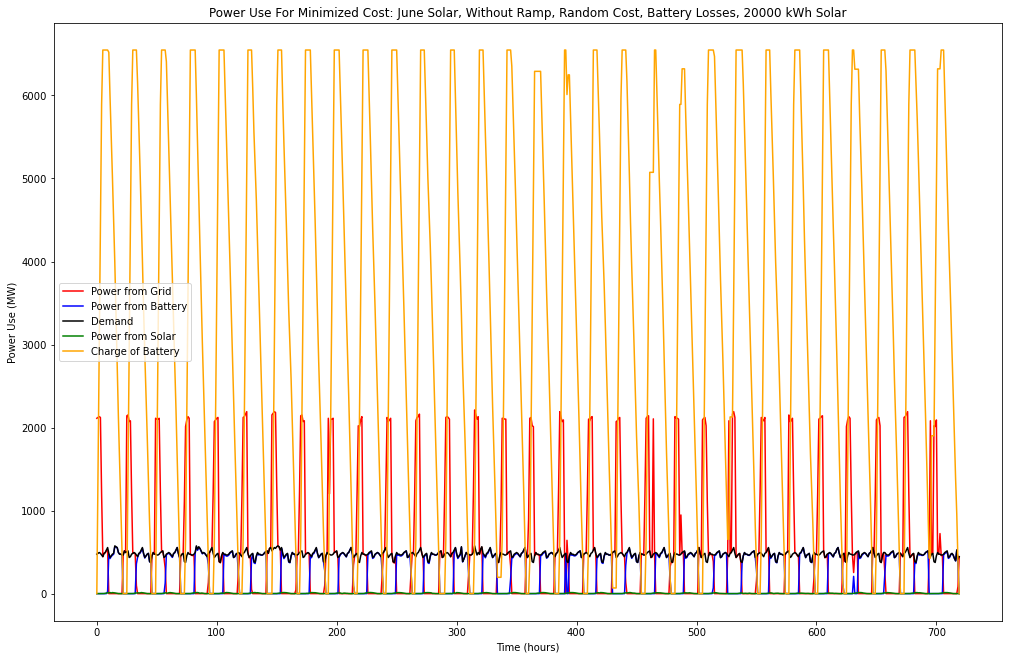

In [40]:
import pandas as pd
import cvxpy as cp
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mp

# establishing time length (hours)
t = 720 # one month

# establishing load values
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\ethylene 11.xlsx')
P_L = []
for n in range (0, t):
    P_L = P_L + [df.at[n, 'P_L']]
    
# establishing battery capacity (MW) and efficiency
E_max = cp.Variable()
eff = 0.9

# defining battery charge variable
E_b = cp.Variable(t+1)

# defining power draw variables of grid (P_g_1) and battery (P_ch, P_dis)
P_g_1 = cp.Variable(t)
P_ch = cp.Variable(t)
P_dis = cp.Variable(t)
#P_b = cp.Variable(t)

# defining cost of power from grid (C_1) and cost of battery (C_b)
C_1 = []
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\houston pricing.xlsx', sheet_name='Jun')
for n in range (0, t):
    C_1 = C_1 + [df.at[n, "Settlement Point Price"]*(P_g_1[n])] #random price
    
# adding in solar
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\pvwatts_hourly_Houston_20000kwh.xlsx', sheet_name='j')
P_s = []
for n in range (0, t):
    P_s = P_s + [df.at[n, "ACMW"]]
    
# defining battery cost
i = 0.04/12 # interest rate per month
m = 20*12 # payback period (months)
C_b_1 = 14800*E_max #cost of battery, assume tax included and maintenance included
fv = C_b_1*((1+i)**m) #future value calculation
C_b = fv*(i/(((1+i)**m) - 1))*(1/(1+i)) # monthly payment

# setting up equation to minimize
objective = sum(C_1) + C_b

# establishing constraints
constraints = []
constraints += [P_g_1 >= 0] # power draw is not negative 
constraints += [P_L == P_g_1 + P_dis + -P_ch + P_s] # the sources sum to load requirements
constraints += [E_b[0] == 0] # battery charge at start is zero
constraints += [P_ch >= 0] # charge into the is not negative
constraints += [1 >= eff] #efficiency cannot be greater than one
constraints += [P_dis >= 0] # discharge from battery is not negative
for n in range (0, t):
    constraints += [E_max/4 >= P_ch[n]] # battery charge in one time step cannot be greater than the battery capacity
    constraints += [E_max/4 >= P_dis[n]] # battery discharge in one time step cannot be greater than the battery capaticy
    n+1
for n in range (1, t+1):
    constraints += [E_b[n] == E_b[n-1] + eff*P_ch[n-1] - 1/eff*P_dis[n-1]] 
    # battery effectiveness impacts charge/discharge amounts of battery
    n+1    
for n in range (0, t+1):
    constraints += [E_b[n] >= 0] # battery charge is not negative
    constraints += [E_max >= E_b[n]] # battery charge cannot be greater than the capacity
    n+1  
    
#solving problem
prob = cp.Problem(cp.Minimize(objective), constraints)
prob.solve() 

#printing results
print("status:", prob.status)
print("Battery Capacity [MW]: ", E_max.value)
print("Minimized Cost: $", prob.value)

# battery charge variable for plotting
E_plot = []
for n in range (0, t):
    E_plot = E_plot + [E_b.value[n]]
    
#plotting the results  
plt.plot(range(0,t), P_g_1.value, "red", label = 'Power from Grid') 
plt.plot(range(0,t), P_dis.value, "blue", label = 'Power from Battery')
plt.plot(range(0,t), P_L, "black", label = 'Demand')
plt.plot(range(0,t), P_s, "green", label = 'Power from Solar') 
plt.plot(range(0,t), E_plot, "orange", label = 'Charge of Battery')
plt.xlabel("Time (hours)")
plt.ylabel("Power Use (MW)")
plt.title("Power Use For Minimized Cost: June Solar, Without Ramp, Random Cost, Battery Losses, 20000 kWh Solar")
leg = plt.legend()
fig = mp.pyplot.gcf()
fig.set_size_inches(17, 11)

# Percent Comparison

### June w/ battery/solar

status: optimal
Minimized Cost: $ 6415866.045739316


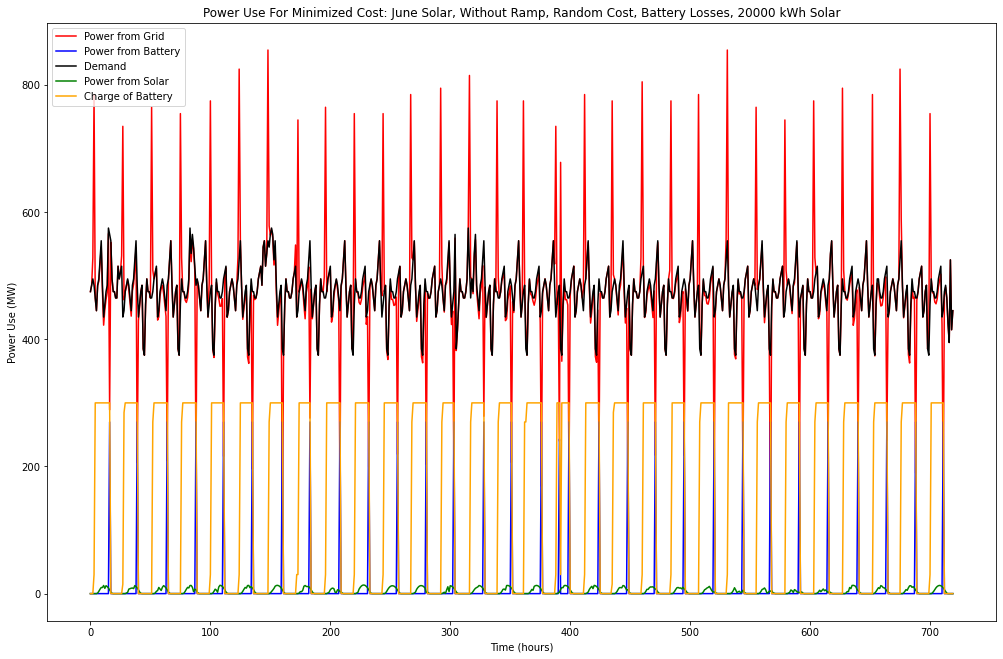

In [43]:
import pandas as pd
import cvxpy as cp
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mp

# establishing time length (hours)
t = 720 # one month

# establishing load values
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\ethylene 11.xlsx')
P_L = []
for n in range (0, t):
    P_L = P_L + [df.at[n, 'P_L']]
    
# establishing battery capacity (MW) and efficiency
E_max = 300
eff = 0.9

# defining battery charge variable
E_b = cp.Variable(t+1)

# defining power draw variables of grid (P_g_1) and battery (P_ch, P_dis)
P_g_1 = cp.Variable(t)
P_ch = cp.Variable(t)
P_dis = cp.Variable(t)
#P_b = cp.Variable(t)

# defining cost of power from grid (C_1) and cost of battery (C_b)
C_1 = []
C_b = []
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\houston pricing.xlsx', sheet_name='Jun')
for n in range (0, t):
    C_1 = C_1 + [df.at[n, "Settlement Point Price"]*(P_g_1[n])] #random price
# fixed price: C_1 = C_1 + [80*P_g_1[n]]
#    C_b = C_b + [(df.at[n, "Cost"])*P_b[n]]
    
# adding in solar
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\pvwatts_hourly_Houston_20000kwh.xlsx', sheet_name='j')
P_s = []
for n in range (0, t):
    P_s = P_s + [df.at[n, "ACMW"]]

# setting up equation to minimize
objective = sum(C_1)

# establishing constraints
constraints = []
constraints += [P_g_1 >= 0] # power draw is not negative 
constraints += [P_L == P_g_1 + P_dis + -P_ch + P_s] # the sources sum to load requirements
constraints += [E_b[0] == 0] # battery charge at start is zero
constraints += [P_ch >= 0] # charge into the is not negative
constraints += [1 >= eff] #efficiency cannot be greater than one
constraints += [P_dis >= 0] # discharge from battery is not negative
for n in range (0, t):
    constraints += [E_max >= P_ch[n]] # battery charge in one time step cannot be greater than the battery capacity
    constraints += [E_max >= P_dis[n]] # battery discharge in one time step cannot be greater than the battery capaticy
    n+1
for n in range (1, t+1):
    constraints += [E_b[n] == E_b[n-1] + eff*P_ch[n-1] - 1/eff*P_dis[n-1]] 
    # battery effectiveness impacts charge/discharge amounts of battery
    n+1    
for n in range (0, t+1):
    constraints += [E_b[n] >= 0] # battery charge is not negative
    constraints += [E_max >= E_b[n]] # battery charge cannot be greater than the capacity
    n+1
    
#solving problem
prob = cp.Problem(cp.Minimize(objective), constraints)
prob.solve() 

#printing results
print("status:", prob.status)
print("Minimized Cost: $", prob.value)

# battery charge variable for plotting
E_plot = []
for n in range (0, t):
    E_plot = E_plot + [E_b.value[n]]
    
#plotting the results  
plt.plot(range(0,t), P_g_1.value, "red", label = 'Power from Grid') 
plt.plot(range(0,t), P_dis.value, "blue", label = 'Power from Battery')
plt.plot(range(0,t), P_L, "black", label = 'Demand')
plt.plot(range(0,t), P_s, "green", label = 'Power from Solar') 
plt.plot(range(0,t), E_plot, "orange", label = 'Charge of Battery')
plt.xlabel("Time (hours)")
plt.ylabel("Power Use (MW)")
plt.title("Power Use For Minimized Cost: June Solar, Without Ramp, Random Cost, Battery Losses, 20000 kWh Solar")
leg = plt.legend()
fig = mp.pyplot.gcf()
fig.set_size_inches(17, 11)

### June w/o battery/solar

status: optimal
Minimized Cost: $ 6789764.300000001


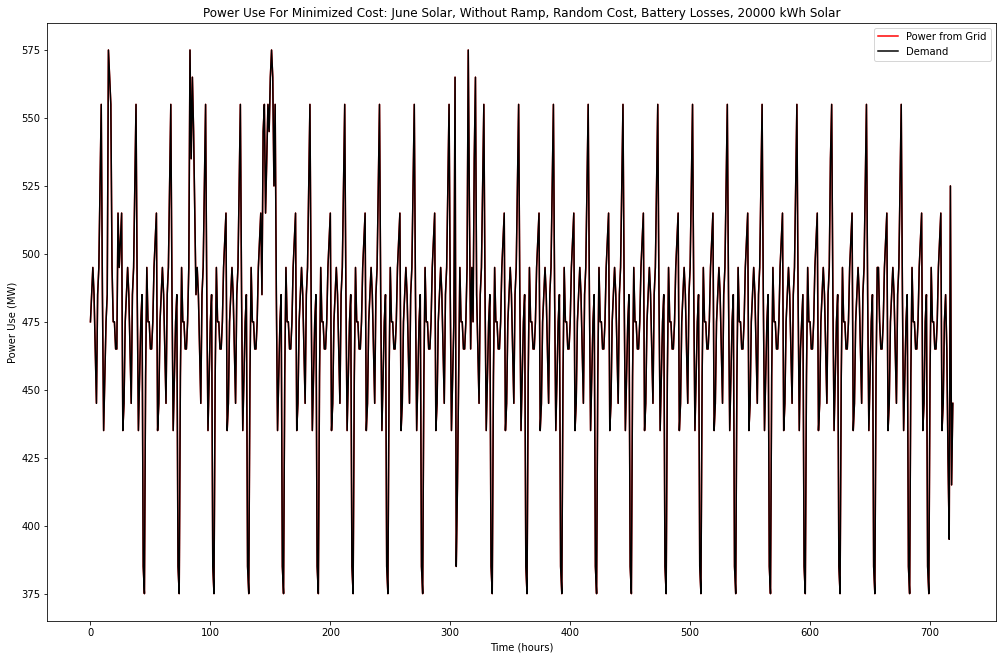

In [46]:
import pandas as pd
import cvxpy as cp
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mp

# establishing time length (hours)
t = 720 # one month

# establishing load values
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\ethylene 11.xlsx')
P_L = []
P_g_1 = []
for n in range (0, t):
    P_L = P_L + [df.at[n, 'P_L']]
    P_g_1 = P_g_1 + [P_L[n]]
    
# defining cost of power from grid (C_1) and cost of battery (C_b)
C_1 = []
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\houston pricing.xlsx', sheet_name='Jun')
for n in range (0, t):
    C_1 = C_1 + [df.at[n, "Settlement Point Price"]*(P_L[n])] #random price
    
# setting up equation to minimize
objective = sum(C_1)
    
#solving problem
prob = cp.Problem(cp.Minimize(objective), constraints)
prob.solve() 

#printing results
print("status:", prob.status)
print("Minimized Cost: $", prob.value)
    
#plotting the results  
plt.plot(range(0,t), P_g_1, "red", label = 'Power from Grid') 
plt.plot(range(0,t), P_L, "black", label = 'Demand')
plt.xlabel("Time (hours)")
plt.ylabel("Power Use (MW)")
plt.title("Power Use For Minimized Cost: June Solar, Without Ramp, Random Cost, Battery Losses, 20000 kWh Solar")
leg = plt.legend()
fig = mp.pyplot.gcf()
fig.set_size_inches(17, 11)

### Dec w/ battery and solar

status: optimal
Minimized Cost: $ 6970631.8834874695


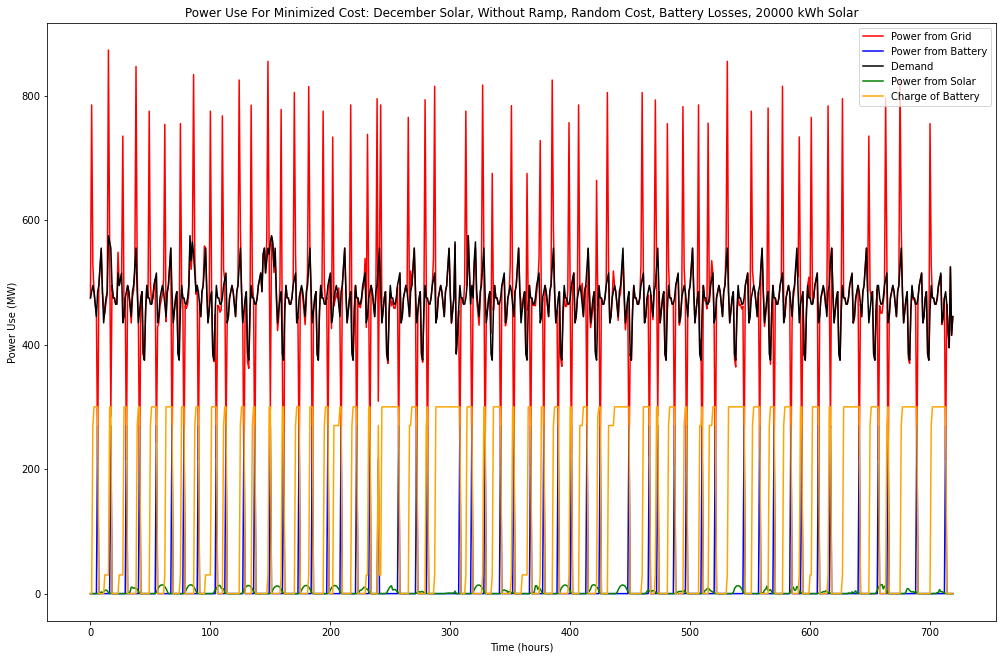

In [47]:
import pandas as pd
import cvxpy as cp
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mp

# establishing time length (hours)
t = 720 # one month

# establishing load values
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\ethylene 11.xlsx')
P_L = []
for n in range (0, t):
    P_L = P_L + [df.at[n, 'P_L']]
    
# establishing battery capacity (MW) and efficiency
E_max = 300
eff = 0.9

# defining battery charge variable
E_b = cp.Variable(t+1)

# defining power draw variables of grid (P_g_1) and battery (P_ch, P_dis)
P_g_1 = cp.Variable(t)
P_ch = cp.Variable(t)
P_dis = cp.Variable(t)
#P_b = cp.Variable(t)

# defining cost of power from grid (C_1) and cost of battery (C_b)
C_1 = []
C_b = []
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\houston pricing.xlsx', sheet_name='Dec')
for n in range (0, t):
    C_1 = C_1 + [df.at[n, "Settlement Point Price"]*(P_g_1[n])] #random price
# fixed price: C_1 = C_1 + [80*P_g_1[n]]
#    C_b = C_b + [(df.at[n, "Cost"])*P_b[n]]
    
# adding in solar
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\pvwatts_hourly_Houston_20000kwh.xlsx', sheet_name='d')
P_s = []
for n in range (0, t):
    P_s = P_s + [df.at[n, "ACMW"]]

# setting up equation to minimize
objective = sum(C_1)

# establishing constraints
constraints = []
constraints += [P_g_1 >= 0] # power draw is not negative 
constraints += [P_L == P_g_1 + P_dis + -P_ch + P_s] # the sources sum to load requirements
constraints += [E_b[0] == 0] # battery charge at start is zero
constraints += [P_ch >= 0] # charge into the is not negative
constraints += [1 >= eff] #efficiency cannot be greater than one
constraints += [P_dis >= 0] # discharge from battery is not negative
for n in range (0, t):
    constraints += [E_max >= P_ch[n]] # battery charge in one time step cannot be greater than the battery capacity
    constraints += [E_max >= P_dis[n]] # battery discharge in one time step cannot be greater than the battery capaticy
    n+1
for n in range (1, t+1):
    constraints += [E_b[n] == E_b[n-1] + eff*P_ch[n-1] - 1/eff*P_dis[n-1]] 
    # battery effectiveness impacts charge/discharge amounts of battery
    n+1    
for n in range (0, t+1):
    constraints += [E_b[n] >= 0] # battery charge is not negative
    constraints += [E_max >= E_b[n]] # battery charge cannot be greater than the capacity
    n+1
    
#solving problem
prob = cp.Problem(cp.Minimize(objective), constraints)
prob.solve() 

#printing results
print("status:", prob.status)
print("Minimized Cost: $", prob.value)

# battery charge variable for plotting
E_plot = []
for n in range (0, t):
    E_plot = E_plot + [E_b.value[n]]
    
#plotting the results  
plt.plot(range(0,t), P_g_1.value, "red", label = 'Power from Grid') 
plt.plot(range(0,t), P_dis.value, "blue", label = 'Power from Battery')
plt.plot(range(0,t), P_L, "black", label = 'Demand')
plt.plot(range(0,t), P_s, "green", label = 'Power from Solar') 
plt.plot(range(0,t), E_plot, "orange", label = 'Charge of Battery')
plt.xlabel("Time (hours)")
plt.ylabel("Power Use (MW)")
plt.title("Power Use For Minimized Cost: December Solar, Without Ramp, Random Cost, Battery Losses, 20000 kWh Solar")
leg = plt.legend()
fig = mp.pyplot.gcf()
fig.set_size_inches(17, 11)

### Dec w/o battery and solar

status: optimal
Minimized Cost: $ 6789764.300000001


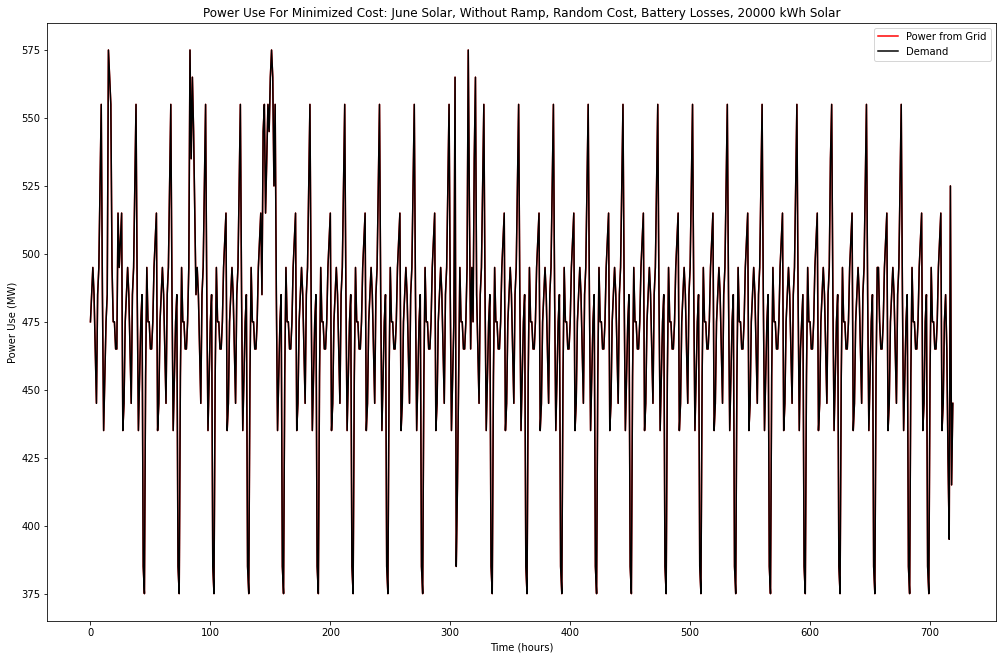

In [48]:
import pandas as pd
import cvxpy as cp
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mp

# establishing time length (hours)
t = 720 # one month

# establishing load values
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\ethylene 11.xlsx')
P_L = []
P_g_1 = []
for n in range (0, t):
    P_L = P_L + [df.at[n, 'P_L']]
    P_g_1 = P_g_1 + [P_L[n]]
    
# defining cost of power from grid (C_1) and cost of battery (C_b)
C_1 = []
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\houston pricing.xlsx', sheet_name='Jun')
for n in range (0, t):
    C_1 = C_1 + [df.at[n, "Settlement Point Price"]*(P_L[n])] #random price
    
# setting up equation to minimize
objective = sum(C_1)
    
#solving problem
prob = cp.Problem(cp.Minimize(objective), constraints)
prob.solve() 

#printing results
print("status:", prob.status)
print("Minimized Cost: $", prob.value)
    
#plotting the results  
plt.plot(range(0,t), P_g_1, "red", label = 'Power from Grid') 
plt.plot(range(0,t), P_L, "black", label = 'Demand')
plt.xlabel("Time (hours)")
plt.ylabel("Power Use (MW)")
plt.title("Power Use For Minimized Cost: June Solar, Without Ramp, Random Cost, Battery Losses, 20000 kWh Solar")
leg = plt.legend()
fig = mp.pyplot.gcf()
fig.set_size_inches(17, 11)